In [11]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import seaborn as sns

In [12]:
# General Linear Congruence Generator
def linear_generator(x):
    a = 10369
    c = 1439571
    m = 2**32
    x = (a*x + c)%m
    return x, x/m

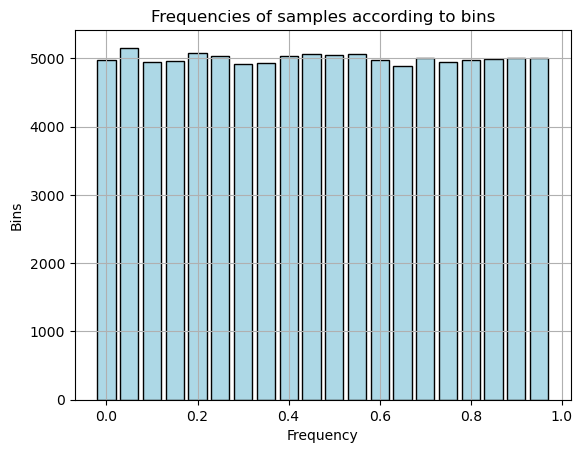

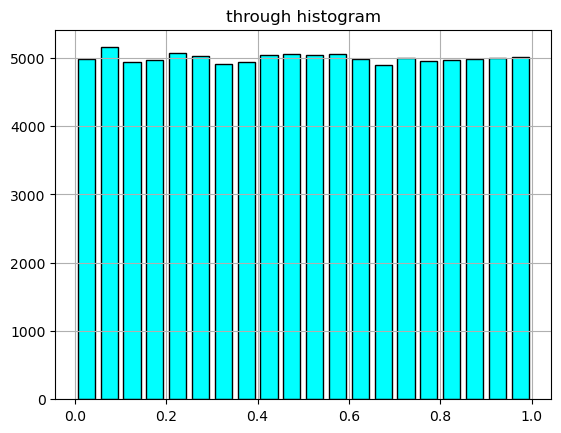

In [187]:
x = 42
N = 100000
group = np.zeros(20)
z = []
for _ in range(N):
    x, u = linear_generator(x)
    z.append(u)
    u *= 20
    u = (int)(u//1)
    group[u] += 1

bins = np.arange(0, 1, 0.05)
plt.title('Frequencies of samples according to bins')
plt.xlabel("Frequency")
plt.ylabel("Bins")
plt.bar(bins, group, color = 'lightblue', edgecolor = 'black',width = 0.04)
plt.grid(True)
plt.show()
plt.title("through histogram")
plt.hist(z, bins = 20, edgecolor='black', color='cyan', rwidth = 0.75)
plt.grid(True)
plt.show()

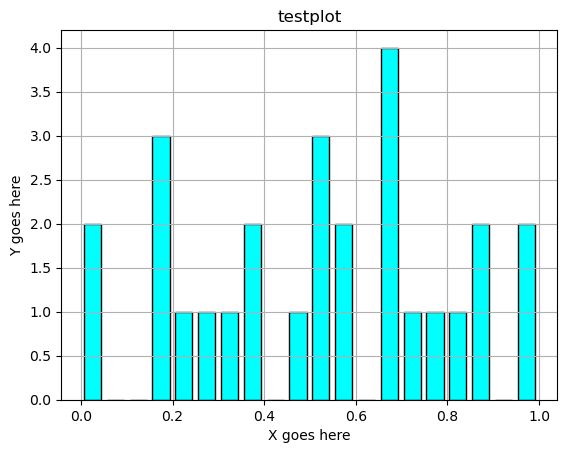

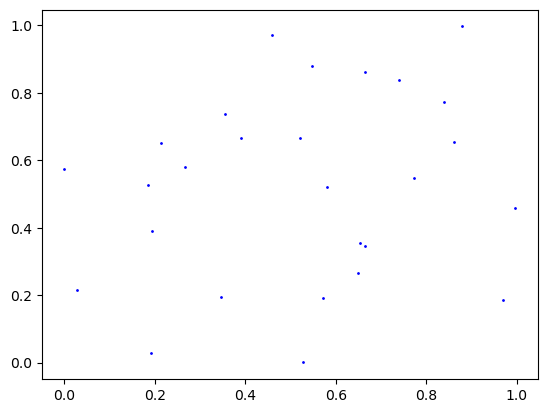

In [131]:
#Lagging fibonacci
u = []
i = 0
x = 42
for _ in range(17):
    x, x1 = linear_generator(x)
    u.append(x1)

N = 10
for i in range(N):
    x = u[i] - u[i+12]
    if(x < 0):
        x += 1
    u.append(x)
u_1 = u[1:]
u_1.append(0) #To maintain same size
plt.hist(u, bins = 20, edgecolor='black', color='cyan', rwidth = 0.75)
plt.grid(True)
plt.title("testplot")
plt.xlabel("X goes here")
plt.ylabel("Y goes here")
plt.show()

plt.scatter(u_1, u, s = 1, color ='blue')

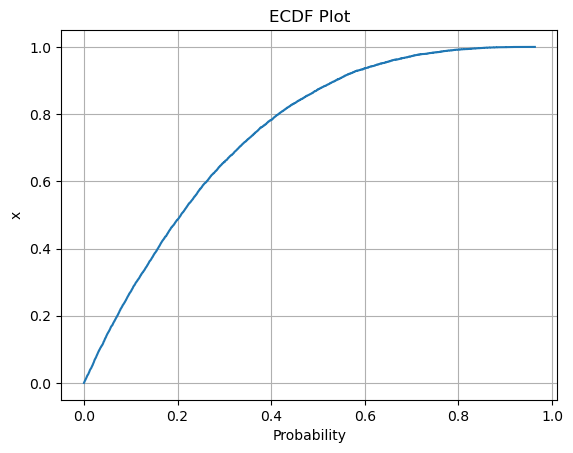

[1.000e-04 2.000e-04 3.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]


In [233]:
N = 10000
x = 42
z = []
for _ in range(N):
    x, u = linear_generator(x)
    z.append(1 - (1 - u)**(1/3))

z = np.sort(z)
y = np.arange(1, len(z) + 1)/len(z)
plt.title("ECDF Plot")
plt.step(z, y)
plt.xlabel("Probability")
plt.grid(True)
plt.ylabel("x")
plt.show()
print(y)

[1.000e-04 2.000e-04 3.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]


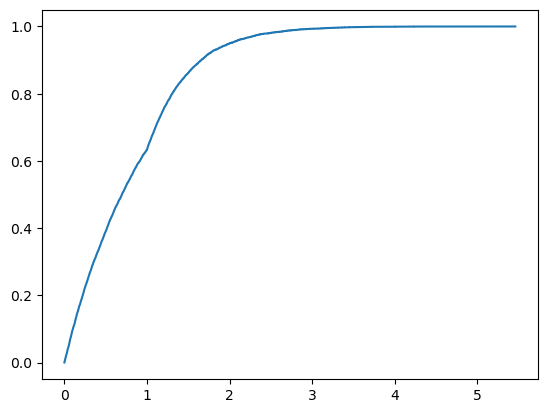

In [159]:
x = 42
N = 10000
z = []
e = math.e

for _ in range(N):
    x, u = linear_generator(x)
    if(u >= 0 and u <= (1 - 1/e)):
        z.append(-1*(math.log(1 - u)))
    else:
        z.append((1 - math.log(1 - u))/2)

x = np.sort(z)
y = np.arange(1, len(z) + 1)/len(z)
plt.step(x, y)

print(y)

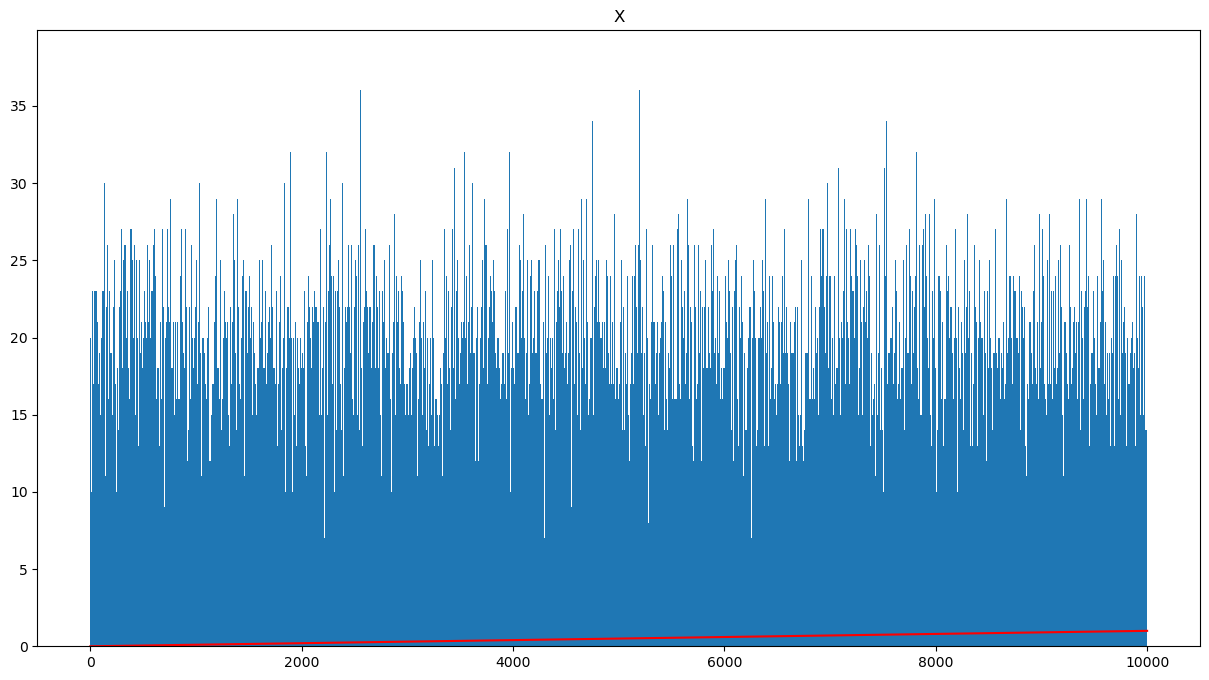

In [227]:
x = 42
N = 100000
z = []
frequency = {}
for _ in range(N):
    x, u = linear_generator(x)
    u = u*4999 + 1
    u = int(u)
    t = 2*u - 1
    z.append(t)
    # frequency[t] += 1
y = [ i for i in range(10000)]
x = np.linspace(0, 1, 10000)

plt.figure(figsize = (15, 8))
plt.title("X")
plt.plot(y, x, color = 'red')
plt.hist(z, bins = 4999,)
plt.show()

In [ ]:
#Generating Normals
# Acceptance Rejection Sampling
x1 = 42
x2 = 696
x3 = 12
N = 10000
z = []
for _ in range(N):
    x1, u1 = linear_generator(x1)
    ex = -math.log(u1)
    x2, u2 = linear_generator(x2)
    if(u2 < 0.5):
        ex = -1*ex
    x3, u3 = linear_generator(x3)
    while(x3 <= (math.exp(-1*(ex**2)/2)/math.exp(1/2 - abs(ex)))):

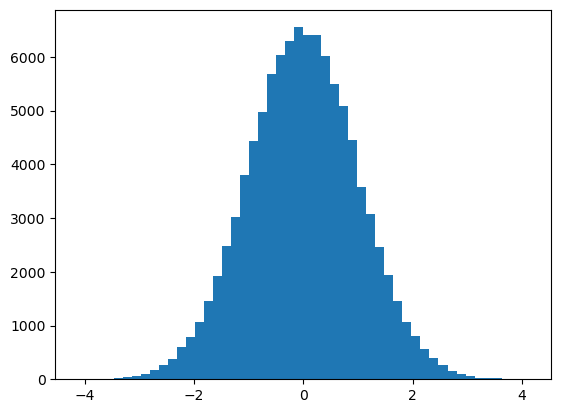

(array([2.000e+00, 3.000e+00, 1.700e+01, 2.700e+01, 3.500e+01, 5.000e+01,
        7.600e+01, 1.440e+02, 2.160e+02, 3.680e+02, 5.200e+02, 7.350e+02,
        1.006e+03, 1.335e+03, 1.797e+03, 2.272e+03, 2.973e+03, 3.533e+03,
        4.188e+03, 4.690e+03, 5.347e+03, 5.929e+03, 6.319e+03, 6.520e+03,
        6.515e+03, 6.409e+03, 6.220e+03, 5.791e+03, 5.152e+03, 4.467e+03,
        3.857e+03, 3.319e+03, 2.609e+03, 2.052e+03, 1.555e+03, 1.224e+03,
        8.830e+02, 6.540e+02, 4.240e+02, 2.970e+02, 1.780e+02, 1.140e+02,
        6.900e+01, 4.700e+01, 2.400e+01, 1.700e+01, 1.000e+01, 3.000e+00,
        3.000e+00, 5.000e+00]),
 array([-4.0025023 , -3.83785052, -3.67319874, -3.50854696, -3.34389518,
        -3.1792434 , -3.01459162, -2.84993984, -2.68528806, -2.52063628,
        -2.3559845 , -2.19133272, -2.02668094, -1.86202916, -1.69737738,
        -1.5327256 , -1.36807382, -1.20342204, -1.03877026, -0.87411848,
        -0.7094667 , -0.54481492, -0.38016314, -0.21551136, -0.05085958,
         0.

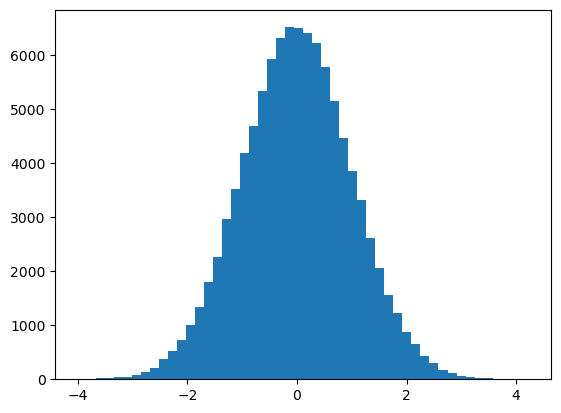

In [243]:
# Box Müller Method
x1 = 42
x2 = 12
N = 100000
z1 = []
z2 = []

for _ in range(N):
    x1, u1 = linear_generator(x1)
    x2, u2 = linear_generator(x2)
    R = math.sqrt(-2*math.log(u1))
    theta = 2*math.pi*u2
    z1.append(R*math.cos(theta))
    z2.append(R*math.sin(theta))

plt.hist(z1, bins = 50)
plt.show()

plt.hist(z2, bins = 50)

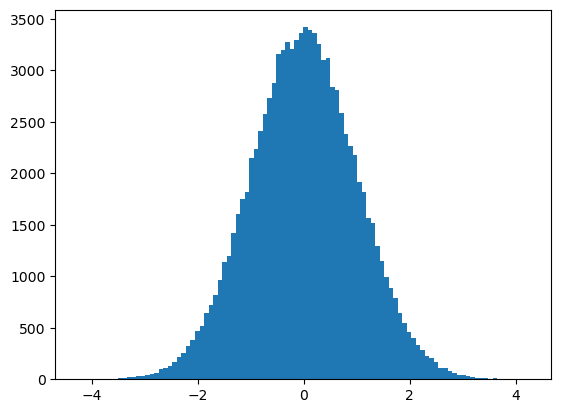

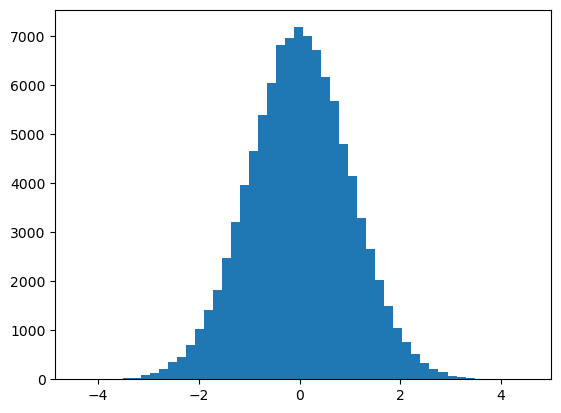

In [257]:
# Box Müller Method
x1 = 42
x2 = 12
N = 100000
z1 = []
z2 = []

for _ in range(N):
    u1 = 1
    u2 = 1
    while((u1**2 + u2**2) > 1):
        x1, u1 = linear_generator(x1)
        x2, u2 = linear_generator(x2)
        u1 = 2*u1 - 1
        u2 = 2*u2 - 1
    t = u1**2 + u2**2
    z1.append(u1*math.sqrt((-2*math.log(t))/t))
    z2.append(u2*math.sqrt((-2*math.log(t))/t))
    # z1.append(u1*math.sqrt((-2*math.log(u1**2 + u2**2))/(u1**2 + u2**2)))
    # z2.append(u2*math.sqrt((-2*math.log(u1**2 + u2**2))/(u1**2 + u2**2)))

plt.hist(z1, bins = 100)
plt.show()
plt.hist(z2, bins = 50)
plt.show()

In [259]:
import numpy as np

# Define the function to integrate
def f(x):
    return np.sin(x)

# Define the limits of integration
a = 0
b = np.pi

# Number of random samples
N = 100000

# Generate N random points in the interval [a, b]
x_random = np.random.uniform(a, b, N)

# Evaluate the function at each random point
f_values = f(x_random)

# Estimate the integral
integral_estimate = (b - a) * np.mean(f_values)

print(f"Monte Carlo estimate of the integral: {integral_estimate}")


Monte Carlo estimate of the integral: 2.006659902226755
